#                            Credit Card Fraud Detection

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import math


# Importing Data 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Data Visualization

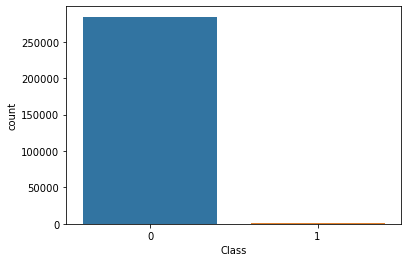

In [6]:
# count plot on single categorical variable 
sns.countplot(x ='Class', data = df) 
  
# Show the plot 
plt.show() 


In [7]:
cnt = df.groupby('Class')
#cnt.head()
cnt.count()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


### Heatmap for Correlation

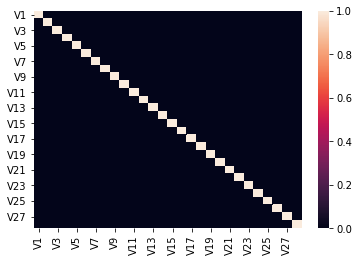

In [8]:
sns.heatmap(df.iloc[:,1:29].corr())

### WE CAN SEE THERE ARE NO CORRELATION BETWEEN ANY OF THE FEATURES. HENCE WE CAN SAY THERE ARE NO REDUNDANT COLUMNS

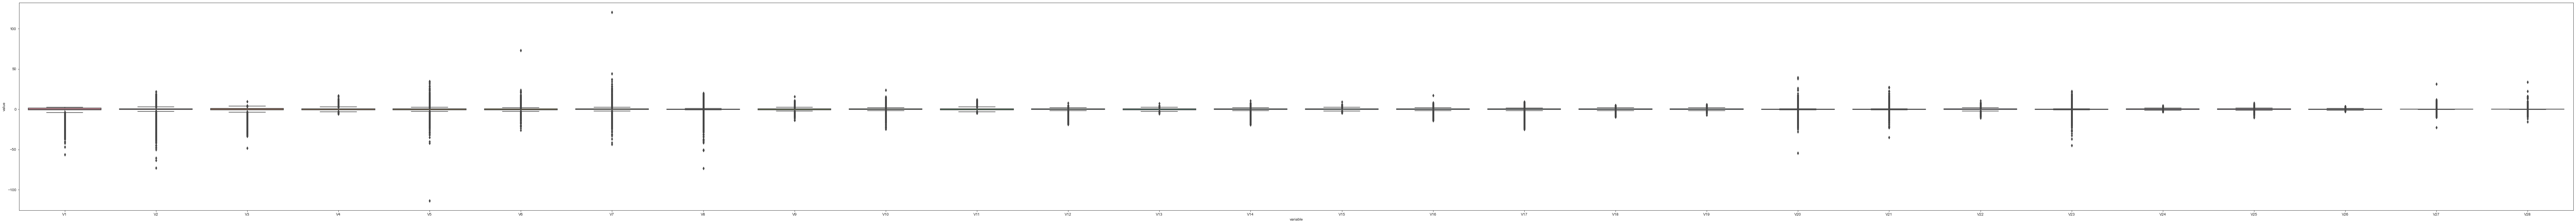

In [9]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(120, 10)
af = df.iloc[:,1:29]
sns.boxplot(x="variable", y="value", data=pd.melt(af),ax=ax)

##### We can visualize the boxplot of the data for outliers

In [10]:
fraud = df[df['Class']==1]['Amount']
fraud.shape

(492,)

## Visualizing all the fraudulent transaction with amount

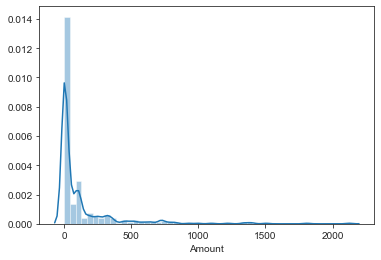

In [11]:
sns.distplot(fraud)

# Feature Addition

One of the given feature is time. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Now we can manipulate time to change it into minutes and then reset the min to zero after 720 minutes to imply the start of the new day and also predicting the activity with respect to the time of the day and not with respect to the first transaction time.

In [12]:
df['Time'] = df['Time']%86400
df['Time'] = df['Time']/60


In [13]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1439.766667,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,1439.783333,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1439.800000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,1439.800000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,1439.866667,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
X1 = df.drop("Class", 1).values
X1.shape
Y1 = df["Class"].values
Y1.shape

(284807,)

# Data Cleaning and Data Split

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X1)
X1_scaled = scaler.transform(X1)
print(X1_scaled)

[[-2.48637318 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-2.48637318  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-2.48632567 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.61769     0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.61769    -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.61788003 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


In [16]:
scaler.mean_

array([ 8.72277045e+02,  1.16597995e-15,  3.41690805e-16, -1.37314996e-15,
        2.08686861e-15,  9.60406632e-16,  1.49010721e-15, -5.55646730e-16,
        1.17755593e-16, -2.40645529e-15,  2.23975129e-15,  1.67332693e-15,
       -1.25499520e-15,  8.17603027e-16,  1.20629628e-15,  4.91300284e-15,
        1.43766606e-15, -3.80011269e-16,  9.57213260e-16,  1.03981681e-15,
        6.40670259e-16,  1.65656173e-16, -3.44485005e-16,  2.57864790e-16,
        4.47196822e-15,  5.34091469e-16,  1.68709835e-15, -3.66645261e-16,
       -1.22040449e-16,  8.83496193e+01])

## Using SMOTE for oversampling of minority data

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sampling_train=X1
sampling_test=Y1
sampler = SMOTE(random_state = 0, n_jobs = -1)
X1_lr , Y1_lr = sampler.fit_sample(sampling_train, sampling_test)

In [19]:
X1_lr.shape

(568630, 30)

In [20]:
Y1_lr.shape

(568630,)

## Splitting Data


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1_lr, Y1_lr, test_size = 0.25, random_state = 0)

In [22]:
X_train.shape

(426472, 30)

In [23]:
X_test.shape

(142158, 30)

#### Now we have a proper set of Train and Test data split

# Model For Training

## Model 1 - DEEP NEURAL NETWORK

In [24]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import seaborn as sns
%matplotlib inline

def metrics(predictions,model):
    """Display accuracy, confusion matrix, precision, recall and precision_recall_curve
        :predictions,
        :return:
    """
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy: %f' % accuracy)
    
    # confusion matrix
    matrix = confusion_matrix(Y_test, predictions)
    print('Confusion Matrix:' )
    print(matrix)
    sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    
    # precision tp / (tp + fp)
    precision1 = precision_score(Y_test, predictions)
    print('Precision: %f' % precision1)
    # recall: tp / (tp + fn)
    recall1 = recall_score(Y_test, predictions)
    print('Recall: %f' % recall1)



    average_precision = average_precision_score(Y_test, predictions)
    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))
    disp = plot_precision_recall_curve(model, X_test, Y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(average_precision))


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426472 samples, validate on 142158 samples
Epoch 1/25
426472/426472 [==============================] - 48s 112us/sample - loss: 0.8595 - acc: 0.7500 - val_loss: 0.1547 - val_acc: 0.9460
Epoch 2/25
426472/426472 [==============================] - 48s 113us/sample - loss: 0.1615 - acc: 0.9482 - val_loss: 0.0962 - val_acc: 0.9695
Epoch 3/25
426472/426472 [==============================] - 50s 117us/sample - loss: 0.1040 - acc: 0.9668 - val_loss: 0.0693 - val_acc: 0.9750
Epoch 4/25
426472/426472 [==============================] - 50s 118us/sample - loss: 0.0787 - acc: 0.9741 - val_loss: 0.0534 - val_acc: 0.9818
Epoch 5/25
426472/426472 [==============================] - 50s 118us/sample - loss: 0.0624 - acc: 0.9797 - val_loss: 0.0505 - val_acc: 0.9829
Epoch 6/25
426472/426

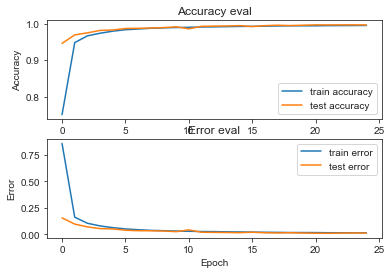

In [25]:

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["acc"], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")


    plt.show()

def get_compiled_model(): 
    
    # build network topology
    model = keras.Sequential()

    # input layer
    #keras.layers.Dense(input_shape=(30)),

    # 1st dense layer
    model.add(keras.layers.Dense(728, activation='relu'))
    model.add(keras.layers.Dropout(0.35))

    # 2nd dense layer
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
        
    # 3rd dense layer
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.1))

    # 4th dense layer
    model.add(keras.layers.Dense(128, activation='relu'))
        
    # output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))   
    
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    #SGD(lr=0.0001)
    model.compile(optimizer=optimiser,
                  loss="binary_crossentropy",
                  metrics=['accuracy'])
        
    
    return model


if __name__ == "__main__":
    
    
    
    DNN = get_compiled_model()
    history = DNN.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=256, epochs=25)
    
    # plot accuracy/error for training and validation
    plot_history(history)
    
    # predict probabilities for test set
    y_DNN = DNN.predict(X_test, verbose=0)
    # predict crisp classes for test set
    yhat_classes = DNN.predict_classes(X_test, verbose=0)
    
    

Accuracy: 0.996680
Confusion Matrix:
[[70450   406]
 [   66 71236]]
Precision: 0.994333
Recall: 0.999074


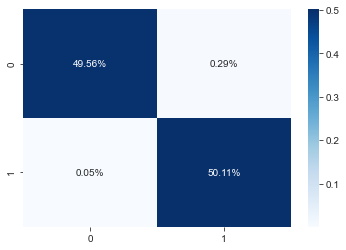

In [26]:
# reduce to 1d array
yhat_probs = y_DNN[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
    
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print('Confusion Matrix:' )
print(matrix)
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    
# precision tp / (tp + fp)
precision1 = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall1)

### Using Deep Learning we have created a model that has an accuracy of 99.67%. It misses out 0.29% of Fraudulent activity and wrongly classifies 0.05% of Non Fraudulent activity

In [64]:
T_F = 1-(0.29/(.29+50.11))
print(T_F)

0.9942460317460318


### As we can see it classified 99.42% of the Fraudulent Activity

##### Now let us compare other models to choose the better model or if the accuracy is in par we can use stacking to vote for predictions to improve the overall performance for this classification for high accuracy rate

## Model 2 - XGBOOST

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
# fit model no training data
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

print(XGB)


# make predictions for test data
y_XGB = XGB.predict(X_test)
y_XGB_classes = [round(value) for value in y_XGB]


XGBClassifier()


Accuracy: 0.986044
Confusion Matrix:
[[70365   491]
 [ 1493 69809]]
Precision: 0.993016
Recall: 0.979061
Average precision-recall score: 0.98


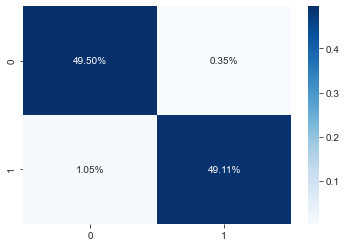

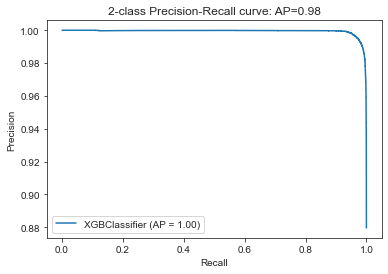

In [30]:
metrics(y_XGB_classes,XGB)

### Using XGBoost we have created a model that has an accuracy of 98.60%. It misses out 0.35% of Fraudulent activity and wrongly classifies 1.05% of Non Fraudulent activity

In [31]:
T_F1 = 1-(0.35/(.35+49.11))
print(T_F1)

0.992923574605742


### As we can see it classified 99.29% of the Fraudulent Activity

## Model 3 - Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def metrics(predictions,model):
    """Display accuracy, confusion matrix, precision, recall and precision_recall_curve
        :predictions,
        :return:
    """
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy: %f' % accuracy)
    
    # confusion matrix
    matrix = confusion_matrix(Y_test, predictions)
    print('Confusion Matrix:' )
    print(matrix)
    sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    
    # precision tp / (tp + fp)
    precision1 = precision_score(Y_test, predictions)
    print('Precision: %f' % precision1)
    # recall: tp / (tp + fn)
    recall1 = recall_score(Y_test, predictions)
    print('Recall: %f' % recall1)



    average_precision = average_precision_score(Y_test, predictions)
    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))
    disp = plot_precision_recall_curve(model, X_test, Y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(average_precision))


In [33]:
logreg = LogisticRegression(random_state = 1,solver='sag',verbose =1)
logreg.fit(X_train, Y_train)
y_LR = logreg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 29 seconds


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.3s finished


Accuracy: 0.933693
Confusion Matrix:
[[69776  1080]
 [ 8346 62956]]
Precision: 0.983134
Recall: 0.882949
Average precision-recall score: 0.93


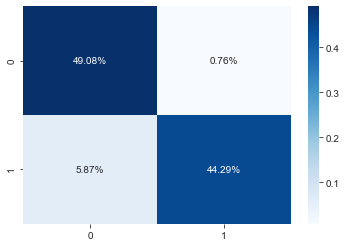

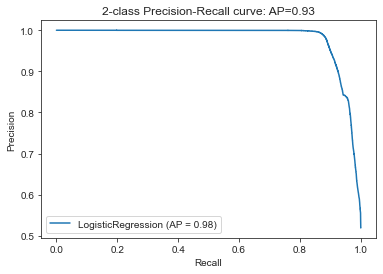

In [34]:
y_LR_classes = [round(value) for value in y_LR]
w2 = metrics(y_LR_classes,logreg)

### Using Logistic Regression we have created a model that has an accuracy of 93.4%. It misses out 0.76% of Fraudulent activity and wrongly classifies 5.87% of Non Fraudulent activity

## Model 4 - RandomForrest Classifier

In [35]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_RF=clf.predict(X_test)

Accuracy: 0.999894
Confusion Matrix:
[[70841    15]
 [    0 71302]]
Precision: 0.999790
Recall: 1.000000
Average precision-recall score: 1.00


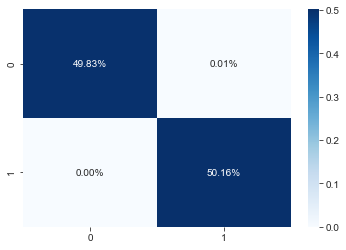

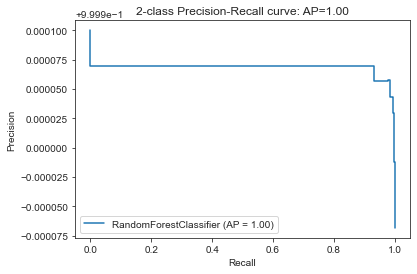

In [36]:
metrics(y_RF,clf)

### Using RandomForrest Classifier we have created a model that has an accuracy of 99.99%. It misses out 0.01% of Fraudulent activity and wrongly classifies 0% of Non Fraudulent activity

# Making  a Ensemble Model with all the classifier

##### We will now use stacking to vote for the result and for the weights of each result we are goimg to use a simple neral network to get the weights

In [43]:
Y1 = DNN.predict(X_train, verbose=0)
Y2 = XGB.predict(X_train)
Y3 = logreg.predict(X_train)
Y4 = clf.predict(X_train)

In [44]:
RF_y = np.array(Y4) 
LR_y = np.array(Y3)
XGB_y = np.array(Y2) 
DNN_y = np.array(Y1) 

In [45]:
Y_main = [RF_y,LR_y,XGB_y,DNN_y[:,0]]

In [46]:
Y_mainpd = pd.DataFrame(Y_main)
Y_mainpd1 = Y_mainpd.T.values

In [47]:
print(Y_mainpd1)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37895346e-04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99938488e-01]]


In [48]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt

In [61]:
def get_compiled_model1(): 
    
    # build network topology
    model = keras.Sequential()

    # input layer
    #keras.layers.Dense(input_shape=(30)),

    # 1st dense layer
    model.add(keras.layers.Dense(2, activation='relu'))

    # output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))   
    
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss="binary_crossentropy",
                  metrics=['accuracy'])
        
    
    return model

if __name__ == "__main__":
    
    
    
    main = get_compiled_model1()
    history = main.fit(Y_mainpd1, Y_train, epochs=5)

Epoch 1/5
426472/426472 [==============================] - 16s 37us/sample - loss: 0.1856 - acc: 0.9907
Epoch 2/5
426472/426472 [==============================] - 16s 37us/sample - loss: 0.0101 - acc: 0.9991
Epoch 3/5
426472/426472 [==============================] - 16s 38us/sample - loss: 0.0013 - acc: 0.9998
Epoch 4/5
426472/426472 [==============================] - 16s 38us/sample - loss: 3.6034e-04 - acc: 1.0000
Epoch 5/5
426472/426472 [==============================] - 16s 38us/sample - loss: 9.6673e-05 - acc: 1.0000


In [52]:
RF_ytest = np.array(y_RF) 
LR_ytest = np.array(y_LR)
XGB_ytest = np.array(y_XGB) 
DNN_ytest = np.array(y_DNN) 

In [53]:
Y_main_test = [RF_ytest,LR_ytest,XGB_ytest,DNN_ytest[:,0]]

In [54]:
Y_maintest = pd.DataFrame(Y_main_test)
Y_maintest = Y_maintest.T.values

In [62]:
    # predict probabilities for test set
    y_predicted_main = main.predict(Y_maintest, verbose=0)
    # predict crisp classes for test set
    y_class_main = main.predict_classes(Y_maintest, verbose=0)

Accuracy: 0.999894
Confusion Matrix:
[[70841    15]
 [    0 71302]]
Precision: 0.999790
Recall: 1.000000


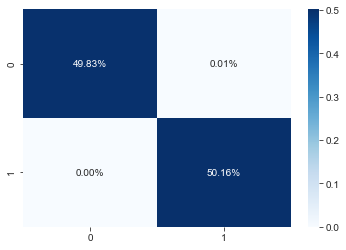

In [63]:
# reduce to 1d array
yhat_pred123 = y_predicted_main[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy_main = accuracy_score(Y_test, y_class_main)
print('Accuracy: %f' % accuracy_main)
    
# confusion matrix
matrix_main = confusion_matrix(Y_test, y_class_main)
print('Confusion Matrix:' )
print(matrix_main)
sns.heatmap(matrix_main/np.sum(matrix_main), annot=True, 
            fmt='.2%', cmap='Blues')
    
# precision tp / (tp + fp)
precision_main = precision_score(Y_test, y_class_main)
print('Precision: %f' % precision_main)
# recall: tp / (tp + fn)
recall_main = recall_score(Y_test, y_class_main)
print('Recall: %f' % recall_main)

### Using Ensemble Model we have created a classifier that has an accuracy of 99.99%. It misses out 0.01% of Fraudulent activity and wrongly classifies 0% of Non Fraudulent activity

## Final Model Selection : Conclusion

1.1) For a class imbalance dataset,Supervised Learning Methods clearly dominates

We compared the Accuracy ,Recall ,AUC score of Logistic ,Random Forest,Deep neural network, XGBoost and stacking to vote with all models

1.2) Ensemble Model and Random Forest Classifier have the higher accuracy than DNN,XGBoost followed by Logistic Regresssion 

1.3) Ensemble Model and Random Forest Classifier have higher recall score > than other models.

1.4) Ensemble Model and Random Forest Classifier have higher auc score than > than other models.

1.5) After all validation therefore,we would like to conclude that Supervised Learning Methods ::: such as Ensemble Model and Random Forest Classifier gives a better prediction over Logistic Regression, XGBoost and DNN.

# We concluded Ensemble Model and Random Forest Classifier are the best fit model

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019